In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

In [22]:
df = quandl.get("SBIN.NS")
df = df[
    [
        "Adj. Open",
        "Adj. High",
        "Adj. Low",
        "Adj. Close",
        "Adj. Volume",
    ]
]


ValueError: The column index must be expressed as an integer for SBIN.NS.

In [17]:
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Close"]) / df["Adj. Close"] * 100.0

df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"] * 100.0

df = df[["Adj. Close", "HL_PCT", "PCT_change", "Adj. Volume"]]

forecast_col = "Adj. Close"
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(df)))
df["label"] = df[forecast_col].shift(-forecast_out)

In [18]:
X = np.array(df.drop(["label"], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df["label"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[188.29946382 187.0115658  186.22473871 183.32764448 181.00133654
 183.16898305 182.13684263 182.01068186 185.21700379 187.28591163
 187.32793447 186.38128522 185.19608495 181.25628635 183.9560684
 183.07419854 181.65286331 181.40430146 180.77251036 181.34528773
 181.26242832 184.69759257 183.84113183 184.35326136 184.34703851
 186.18470147 188.74471938 186.85754516 186.62107842 187.24405961
 187.35961875 182.60249043 182.6831902  183.13038276 181.16690029
 184.37151059 184.16555448 185.23844066 187.2815953  186.55738429
 186.62836572 186.60492785 187.65547024 189.57028699 188.35846638
 191.60776079 191.87391995 190.98353216 189.4792657  189.29235889
 186.37333015 182.95273018 183.68694162 179.76496817 178.73396838
 179.17979023 179.58206779 171.25543204 167.88675609 174.0070616
 170.60555749 165.89454068 166.94834463 173.88093608 175.8472243
 178.99029828 185.0909302  184.35449977 183.7440145  182.91929104
 184.63295633 187.90169129 191.45582654 190.81309582 190.48943118
 186.99059436

C:\Users\ENGEE\AppData\Local\Temp\ipykernel_7756\2782433841.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["label"], 1))
C:\Users\ENGEE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [19]:

df["Forecast"] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

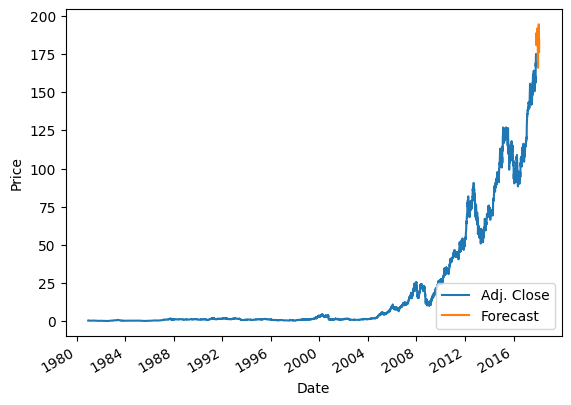

In [20]:
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()